## Random Walk Simulation.
First, let's go ahead and install the requirements.

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Run the White Noise Process
The white noise process is a sequence of random variables with a mean of zero and constant variance, where each value in the sequence is independent and identically distributed. It is often used in time series analysis and modeling to represent a random, unpredictable disturbance or noise with no discernible pattern or correlation over time.

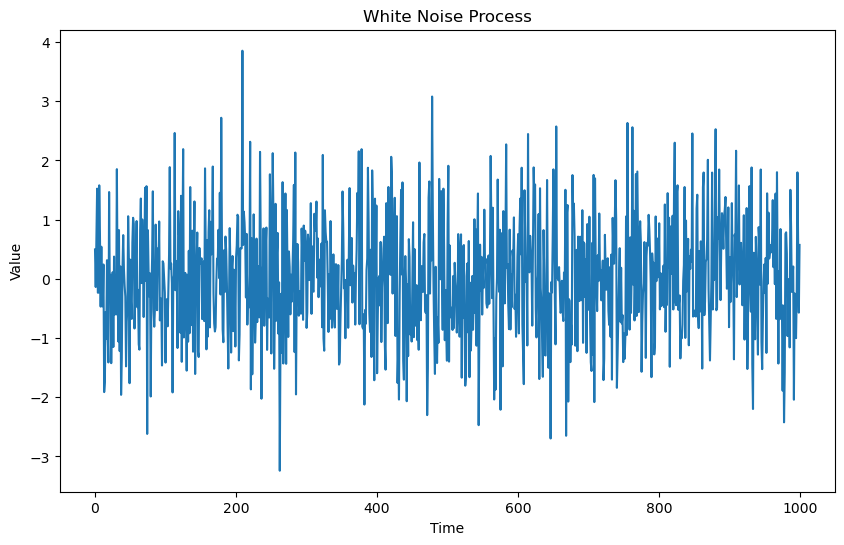

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_walk(n=1000, mean=0, std_dev=1):
    return np.cumsum(np.random.normal(mean, std_dev, n))

# Generate random walk
n = 1000
random_walk = generate_random_walk(n=n)
random_walk

# Generate white noise
np.random.seed(42)
white_noise = np.random.normal(0, 1, 1000)

# Plot the white noise
plt.figure(figsize=(10, 6))
plt.plot(white_noise)
plt.title('White Noise Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 3. Generating a Random Walk
After we have clear what is, and how the White Noise process works. Let's continue generating a Random Walk to futher understand why it is important. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output, display

# Generate a random walk
def generate_random_walk(num_steps, step_size, seed=None):
    np.random.seed(seed)
    steps = np.random.choice([-1, 1], size=num_steps) * step_size
    random_walk = np.cumsum(steps)
    return random_walk

# Create the interactive plot
def plot_random_walk(num_steps=1000, step_size=1.0, seed=0):
    random_walk = generate_random_walk(num_steps, step_size, seed)
    
    clear_output(wait=True)  # Clear previous output to avoid duplicate plots
    plt.figure(figsize=(10, 6))
    plt.plot(random_walk)
    plt.title("Random Walk")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

# Display the widgets and the interactive plot
num_steps_widget = widgets.IntSlider(value=1000, min=100, max=2000, step=100, description='Steps:')
step_size_widget = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Step Size:')
seed_widget = widgets.IntText(value=0, description='Seed')

# Use interact to create an interactive plot
widgets.interact(plot_random_walk, num_steps=num_steps_widget, step_size=step_size_widget, seed=seed_widget)


interactive(children=(IntSlider(value=1000, description='Steps:', max=2000, min=100, step=100), FloatSlider(va…

<function __main__.plot_random_walk(num_steps=1000, step_size=1.0, seed=0)>

## Once we have generated the Random Walk let's analyze the data.
### Mean: By examining the mean of price changes, we can determine if there is any significant bias or drift in the price movements. If the mean is zero or close to zero, it supports the Random Walk hypothesis, suggesting no consistent direction in price changes.
### Variance: The variance of price changes helps in understanding the overall volatility. For a true random walk, the variance should remain stable over time, indicating that the volatility does not change.
### Standard Deviation: By calculating the standard deviation, we can assess the expected range of price changes. If the price follows a random walk, the standard deviation will provide a reliable measure of the risk and potential variability in price movements.

In [5]:
#Statistical Analysis

def calculate_statistics(random_walk):
    """
    Calculate statistics for the random walk.
    
    Parameters:
    random_walk (np.ndarray): Array containing the random walk values
    
    Returns:
    dict: Dictionary with mean, variance, and standard deviation of the random walk
    """
    stats = {
        'mean': np.mean(random_walk),
        'variance': np.var(random_walk),
        'std_dev': np.std(random_walk)
    }
    return stats

# Example usage
random_walk = generate_random_walk(num_steps=1000, step_size=1.0, seed=0)
stats = calculate_statistics(random_walk)
print(stats)

{'mean': 18.18, 'variance': 90.47160000000001, 'std_dev': 9.511656007236596}


## Finally, we'll Load and Save the Functionality

In [7]:
import pickle

def save_object(obj, filename):
    """
    Save an object to a file using pickle.
    
    Parameters:
    obj (any): Object to save
    filename (str): Name of the file to save the object
    """
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)

def load_object(filename):
    """
    Load an object from a file using pickle.
    
    Parameters:
    filename (str): Name of the file to load the object
    
    Returns:
    any: Loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Example usage
save_object(random_walk, 'random_walk.pkl')
loaded_random_walk = load_object('random_walk.pkl')
print(loaded_random_walk)

[-1.  0.  1.  0.  1.  2.  3.  4.  5.  6.  7.  6.  5.  6.  5.  4.  3.  2.
  1.  2.  1.  2.  3.  2.  1.  2.  3.  4.  5.  4.  5.  4.  5.  4.  5.  6.
  5.  6.  7.  6.  5.  6.  5.  6.  7.  8.  9. 10.  9. 10.  9. 10. 11. 12.
 13. 12. 13. 12. 11. 12. 13. 12. 13. 12. 13. 12. 11. 10.  9.  8.  9. 10.
  9.  8.  7.  8.  9.  8.  9.  8.  7.  8.  7.  8.  9. 10. 11. 12. 13. 12.
 13. 14. 13. 12. 13. 12. 11. 12. 13. 12. 13. 12. 11. 12. 11. 10.  9. 10.
 11. 10. 11. 10.  9.  8.  7.  6.  7.  6.  7.  6.  7.  8.  9. 10. 11. 10.
 11. 12. 13. 14. 13. 14. 15. 14. 13. 14. 13. 12. 11. 10. 11. 12. 11. 10.
 11. 10. 11. 12. 13. 14. 13. 12. 11. 12. 11. 12. 13. 14. 13. 14. 13. 12.
 13. 12. 13. 14. 13. 12. 13. 12. 13. 12. 13. 12. 13. 12. 13. 12. 11. 10.
 11. 10. 11. 10. 11. 10.  9.  8.  7.  6.  7.  6.  5.  6.  5.  4.  3.  4.
  3.  2.  3.  2.  3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  1.  0. -1. -2.
 -3. -2. -3. -2. -3. -4. -5. -4. -3. -2. -3. -4. -3. -2. -1.  0. -1. -2.
 -3. -2. -1. -2. -1. -2. -3. -2. -3. -2. -1.  0.  1

# Conclusion
 In this notebook, we have successfully demonstrated the generation of a random walk using Python. We began by exploring the fundamental concept of random walks and their significance in various fields, particularly in financial modeling. Through our implementation, we generated a random walk series, visualized it, and saved the results for future use.

## Key takeaways include:
### Understanding Random Walks: 
We delved into the theory behind random walks, discussing their stochastic nature and relevance to modeling stock prices and other time series data.

### Python Implementation: 
Using Python, we generated a random walk by iteratively applying random steps to an initial value. This practical implementation provided a hands-on understanding of the process.

### Data Visualization: 
Visualizing the random walk helped us to observe its behavior over time, reinforcing the theoretical concepts discussed.

### Data Persistence: 
By saving the random walk data using the pickle module, we ensured that our results can be easily accessed and reused in future analyses.

This notebook serves as a foundational guide for anyone looking to understand and implement random walks in Python. The methods and techniques demonstrated here can be extended and applied to more complex stochastic processes and financial models. As you continue exploring, consider experimenting with different parameters, distributions, and applications of random walks to deepen your understanding and broaden your analytical toolkit. 

### Interpretation of the Results

#### Mean (18.18): 
The mean value indicates an upward drift, suggesting that the random walk has a tendency to increase over time rather than hover around the initial value. This could be due to a bias in the step increments.

#### Variance (90.4716): 
The high variance shows that the random walk has a significant spread of values around the mean. This indicates that the path of the random walk is highly volatile and the values can vary widely over time.

#### Standard Deviation (9.51): 
The standard deviation further confirms the high level of volatility. The random walk values typically deviate from the mean by 9.51 units, reflecting substantial fluctuations in the random walk's path.

##### These results highlight that the random walk you generated exhibits a strong upward trend and considerable volatility. Such characteristics are essential to consider when applying this random walk model in financial modeling or other fields where predicting future behavior is critical. The upward drift might be particularly interesting for financial applications where a trend can significantly impact predictions and decisions.